In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('C:/Users/User/Downloads/11v11.xlsx')

In [3]:
df

,Date,Match,Result,Score,Competition
0,12 Sep 2023,Morocco v Burkina Faso,W,1-0,International Friendly
1,14 Oct 2023,Ivory Coast v Morocco,D,1-1,International Friendly
2,17 Oct 2023,Morocco v Liberia,W,3-0,Africa Cup of Nations
3,21 Nov 2023,Tanzania v Morocco,W,0-2,FIFA World Cup
4,17 Jan 2024,Morocco v Tanzania,W,3-0,Africa Cup of Nations
...,...,...,...,...,...
689,01 Jan 1960,Morocco v Yugoslavia,L,0-5,International Friendly
690,15 May 1960,Morocco v Spain,D,3-3,A v B
691,12 Jun 1960,Morocco v Italy,L,1-3,A v B
692,23 Oct 1957,Morocco v Tunisia,W,3-1,Pan Arab Games


In [4]:
print(df.describe())

               Date              Match Result Score             Competition
count           694                694    694   694                     694
unique          687                201      3    51                      34
top     31 Jul 1983  Morocco v Tunisia      W   1-0  International Friendly
freq              4                 26    339    91                     219


Date:

Count: 694
Unique: 687
Top: "31 Jul 1983" (most frequent date, occurring 4 times)
Analysis: The Date column is mostly unique with a few repeated dates.
Match:

Count: 694
Unique: 201
Top: "Morocco v Tunisia" (most frequent match, occurring 26 times)
Analysis: The Match column has repeated entries, indicating recurring matchups.
Result:

Count: 694
Unique: 3 (values: W, D, L)
Top: "W" (most frequent result, occurring 339 times)
Analysis: The Result column appears to have consistent categorical values representing Win, Draw, and Loss.
Score:

Count: 694
Unique: 51
Top: "1-0" (most frequent score, occurring 91 times)
Analysis: The Score column has a reasonable number of unique values indicating different match outcomes.
Competition:

Count: 694
Unique: 34
Top: "International Friendly" (most frequent competition, occurring 219 times)
Analysis: The Competition column has a diverse set of values with some competitions being more frequent than others.

In [5]:
print(df.isnull().sum())

Date           0
Match          0
Result         0
Score          0
Competition    0
dtype: int64


In [6]:
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')


Number of duplicate rows: 0


In [7]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')

In [8]:
df

,Date,Match,Result,Score,Competition
0,2023-09-12,Morocco v Burkina Faso,W,1-0,International Friendly
1,2023-10-14,Ivory Coast v Morocco,D,1-1,International Friendly
2,2023-10-17,Morocco v Liberia,W,3-0,Africa Cup of Nations
3,2023-11-21,Tanzania v Morocco,W,0-2,FIFA World Cup
4,2024-01-17,Morocco v Tanzania,W,3-0,Africa Cup of Nations
...,...,...,...,...,...
689,1960-01-01,Morocco v Yugoslavia,L,0-5,International Friendly
690,1960-05-15,Morocco v Spain,D,3-3,A v B
691,1960-06-12,Morocco v Italy,L,1-3,A v B
692,1957-10-23,Morocco v Tunisia,W,3-1,Pan Arab Games


In [9]:
# Extract 'Home_Team' and 'Away_Team' from 'Match'
df[['Home_Team', 'Away_Team']] = df['Match'].str.split(' v ', expand=True)

In [10]:
df

,Date,Match,Result,Score,Competition,Home_Team,Away_Team
0,2023-09-12,Morocco v Burkina Faso,W,1-0,International Friendly,Morocco,Burkina Faso
1,2023-10-14,Ivory Coast v Morocco,D,1-1,International Friendly,Ivory Coast,Morocco
2,2023-10-17,Morocco v Liberia,W,3-0,Africa Cup of Nations,Morocco,Liberia
3,2023-11-21,Tanzania v Morocco,W,0-2,FIFA World Cup,Tanzania,Morocco
4,2024-01-17,Morocco v Tanzania,W,3-0,Africa Cup of Nations,Morocco,Tanzania
...,...,...,...,...,...,...,...
689,1960-01-01,Morocco v Yugoslavia,L,0-5,International Friendly,Morocco,Yugoslavia
690,1960-05-15,Morocco v Spain,D,3-3,A v B,Morocco,Spain
691,1960-06-12,Morocco v Italy,L,1-3,A v B,Morocco,Italy
692,1957-10-23,Morocco v Tunisia,W,3-1,Pan Arab Games,Morocco,Tunisia


In [11]:
# Clean 'Score' and extract 'Home_Score' and 'Away_Score'
df['Score'] = df['Score'].str.extract(r'(\d+-\d+)')
df[['Home_Score', 'Away_Score']] = df['Score'].str.split('-', expand=True)

In [12]:
df

,Date,Match,Result,Score,Competition,Home_Team,Away_Team,Home_Score,Away_Score
0,2023-09-12,Morocco v Burkina Faso,W,1-0,International Friendly,Morocco,Burkina Faso,1,0
1,2023-10-14,Ivory Coast v Morocco,D,1-1,International Friendly,Ivory Coast,Morocco,1,1
2,2023-10-17,Morocco v Liberia,W,3-0,Africa Cup of Nations,Morocco,Liberia,3,0
3,2023-11-21,Tanzania v Morocco,W,0-2,FIFA World Cup,Tanzania,Morocco,0,2
4,2024-01-17,Morocco v Tanzania,W,3-0,Africa Cup of Nations,Morocco,Tanzania,3,0
...,...,...,...,...,...,...,...,...,...
689,1960-01-01,Morocco v Yugoslavia,L,0-5,International Friendly,Morocco,Yugoslavia,0,5
690,1960-05-15,Morocco v Spain,D,3-3,A v B,Morocco,Spain,3,3
691,1960-06-12,Morocco v Italy,L,1-3,A v B,Morocco,Italy,1,3
692,1957-10-23,Morocco v Tunisia,W,3-1,Pan Arab Games,Morocco,Tunisia,3,1


In [13]:
# Convert scores to numeric values
df['Home_Score'] = pd.to_numeric(df['Home_Score'])
df['Away_Score'] = pd.to_numeric(df['Away_Score'])

In [14]:
df

,Date,Match,Result,Score,Competition,Home_Team,Away_Team,Home_Score,Away_Score
0,2023-09-12,Morocco v Burkina Faso,W,1-0,International Friendly,Morocco,Burkina Faso,1,0
1,2023-10-14,Ivory Coast v Morocco,D,1-1,International Friendly,Ivory Coast,Morocco,1,1
2,2023-10-17,Morocco v Liberia,W,3-0,Africa Cup of Nations,Morocco,Liberia,3,0
3,2023-11-21,Tanzania v Morocco,W,0-2,FIFA World Cup,Tanzania,Morocco,0,2
4,2024-01-17,Morocco v Tanzania,W,3-0,Africa Cup of Nations,Morocco,Tanzania,3,0
...,...,...,...,...,...,...,...,...,...
689,1960-01-01,Morocco v Yugoslavia,L,0-5,International Friendly,Morocco,Yugoslavia,0,5
690,1960-05-15,Morocco v Spain,D,3-3,A v B,Morocco,Spain,3,3
691,1960-06-12,Morocco v Italy,L,1-3,A v B,Morocco,Italy,1,3
692,1957-10-23,Morocco v Tunisia,W,3-1,Pan Arab Games,Morocco,Tunisia,3,1


In [15]:
# Convert 'Result' to a categorical type
df['Result'] = df['Result'].astype('category')

In [16]:
df

,Date,Match,Result,Score,Competition,Home_Team,Away_Team,Home_Score,Away_Score
0,2023-09-12,Morocco v Burkina Faso,W,1-0,International Friendly,Morocco,Burkina Faso,1,0
1,2023-10-14,Ivory Coast v Morocco,D,1-1,International Friendly,Ivory Coast,Morocco,1,1
2,2023-10-17,Morocco v Liberia,W,3-0,Africa Cup of Nations,Morocco,Liberia,3,0
3,2023-11-21,Tanzania v Morocco,W,0-2,FIFA World Cup,Tanzania,Morocco,0,2
4,2024-01-17,Morocco v Tanzania,W,3-0,Africa Cup of Nations,Morocco,Tanzania,3,0
...,...,...,...,...,...,...,...,...,...
689,1960-01-01,Morocco v Yugoslavia,L,0-5,International Friendly,Morocco,Yugoslavia,0,5
690,1960-05-15,Morocco v Spain,D,3-3,A v B,Morocco,Spain,3,3
691,1960-06-12,Morocco v Italy,L,1-3,A v B,Morocco,Italy,1,3
692,1957-10-23,Morocco v Tunisia,W,3-1,Pan Arab Games,Morocco,Tunisia,3,1


In [17]:
print(df.head())
print(df.info())

        Date                   Match Result Score             Competition  \
0 2023-09-12  Morocco v Burkina Faso      W   1-0  International Friendly   
1 2023-10-14   Ivory Coast v Morocco      D   1-1  International Friendly   
2 2023-10-17       Morocco v Liberia      W   3-0   Africa Cup of Nations   
3 2023-11-21      Tanzania v Morocco      W   0-2          FIFA World Cup   
4 2024-01-17      Morocco v Tanzania      W   3-0   Africa Cup of Nations   

     Home_Team     Away_Team  Home_Score  Away_Score  
0      Morocco  Burkina Faso           1           0  
1  Ivory Coast       Morocco           1           1  
2      Morocco       Liberia           3           0  
3     Tanzania       Morocco           0           2  
4      Morocco      Tanzania           3           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   

In [81]:
from scipy.stats import zscore
import numpy as np
# Calculate Z-scores for all numerical columns
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))

# Define threshold for outliers (typically |Z| > 3)
threshold = 3

# Boolean array indicating outliers
outliers = (z_scores > threshold).any(axis=1)

# Print number of outliers detected
print("Number of outliers detected:", outliers.sum())

# Print rows with outliers
print("Rows with outliers:")
print(df[outliers])

Number of outliers detected: 30
Rows with outliers:
          Date                   Match Result Score  \
29  2021-10-12        Guinea v Morocco      W   1-4   
33  2021-12-04        Jordan v Morocco      W   0-4   
52  2021-01-26        Uganda v Morocco      W   2-5   
83  2017-09-01          Morocco v Mali      W   6-0   
121 2015-10-22         Libya v Morocco      W   0-4   
136 2014-11-13         Morocco v Benin      W   6-1   
175 2012-06-29         Yemen v Morocco      W   0-4   
204 2008-01-21       Namibia v Morocco      W   1-5   
207 2008-03-26       Belgium v Morocco      W   1-4   
209 2008-06-07    Mauritania v Morocco      W   1-4   
214 2006-11-15         Morocco v Gabon      W   6-0   
259 2002-10-03         Morocco v Niger      W   6-1   
306 2000-06-06        Morocco v France      L   1-5   
336 1996-08-29         Morocco v Zaire      W   7-0   
343 1997-04-06         Gabon v Morocco      W   0-4   
350 1996-01-17       Morocco v Armenia      W   6-0   
408 1989-07-2

In [88]:
df

,Date,Match,Result,Score,Competition,Home_Team,Away_Team,Home_Score,Away_Score,Total_Goals,Goal_Difference,Is_Home_Win,Is_Away_Win,Month,Year,DayOfWeek,Result_Encoded
0,2023-09-12,Morocco v Burkina Faso,W,1-0,International Friendly,Morocco,Burkina Faso,1,0,1,1,1,0,9,2023,1,2
1,2023-10-14,Ivory Coast v Morocco,D,1-1,International Friendly,Ivory Coast,Morocco,1,1,2,0,0,0,10,2023,5,0
2,2023-10-17,Morocco v Liberia,W,3-0,Africa Cup of Nations,Morocco,Liberia,3,0,3,3,1,0,10,2023,1,2
3,2023-11-21,Tanzania v Morocco,W,0-2,FIFA World Cup,Tanzania,Morocco,0,2,2,-2,0,1,11,2023,1,2
4,2024-01-17,Morocco v Tanzania,W,3-0,Africa Cup of Nations,Morocco,Tanzania,3,0,3,3,1,0,1,2024,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,1960-01-01,Morocco v Yugoslavia,L,0-5,International Friendly,Morocco,Yugoslavia,0,5,5,-5,0,1,1,1960,4,1
690,1960-05-15,Morocco v Spain,D,3-3,A v B,Morocco,Spain,3,3,6,0,0,0,5,1960,6,0
691,1960-06-12,Morocco v Italy,L,1-3,A v B,Morocco,Italy,1,3,4,-2,0,1,6,1960,6,1
692,1957-10-23,Morocco v Tunisia,W,3-1,Pan Arab Games,Morocco,Tunisia,3,1,4,2,1,0,10,1957,2,2


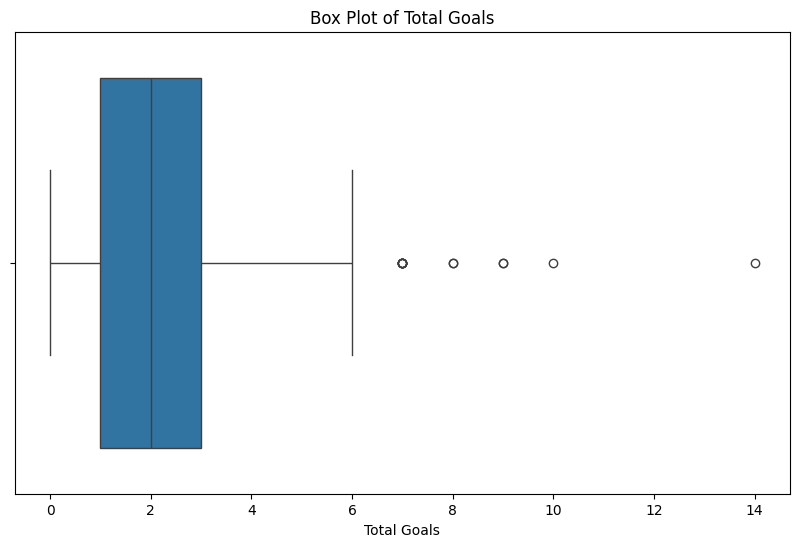

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Goals', data=df)
plt.title('Box Plot of Total Goals')
plt.xlabel('Total Goals')
plt.show()

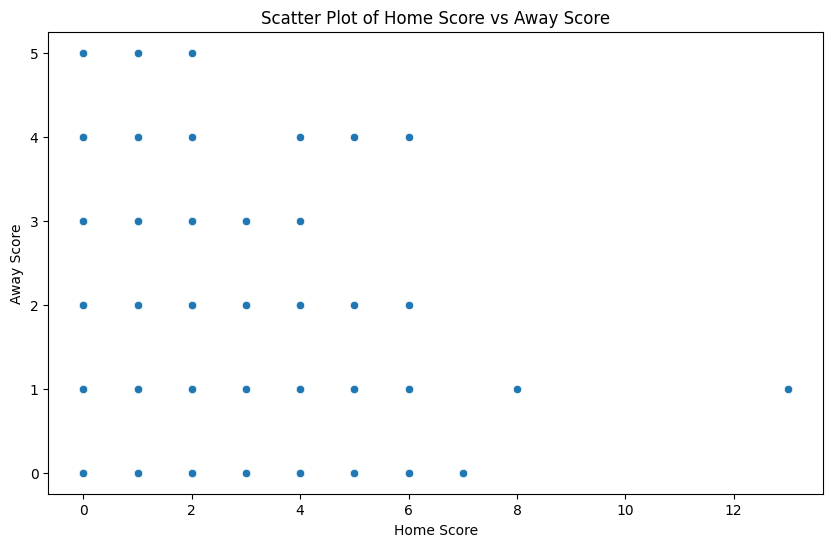

In [83]:
# Create a scatter plot of Home_Score vs Away_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Home_Score', y='Away_Score', data=df)
plt.title('Scatter Plot of Home Score vs Away Score')
plt.xlabel('Home Score')
plt.ylabel('Away Score')
plt.show()

In [85]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df['Total_Goals'])

# Define threshold for outlier removal (e.g., Z-score > 3 or < -3)
threshold = 3
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]

# Remove outliers
df_filtered = df[(z_scores <= threshold) & (z_scores >= -threshold)]

# Display the filtered DataFrame
print("DataFrame after removing outliers using Z-score:")
print(df_filtered)

DataFrame after removing outliers using Z-score:
          Date                   Match Result Score             Competition  \
0   2023-09-12  Morocco v Burkina Faso      W   1-0  International Friendly   
1   2023-10-14   Ivory Coast v Morocco      D   1-1  International Friendly   
2   2023-10-17       Morocco v Liberia      W   3-0   Africa Cup of Nations   
3   2023-11-21      Tanzania v Morocco      W   0-2          FIFA World Cup   
4   2024-01-17      Morocco v Tanzania      W   3-0   Africa Cup of Nations   
..         ...                     ...    ...   ...                     ...   
689 1960-01-01    Morocco v Yugoslavia      L   0-5  International Friendly   
690 1960-05-15         Morocco v Spain      D   3-3                   A v B   
691 1960-06-12         Morocco v Italy      L   1-3                   A v B   
692 1957-10-23       Morocco v Tunisia      W   3-1          Pan Arab Games   
693 1958-04-03         Morocco v Libya      W   2-1  International Friendly   

  

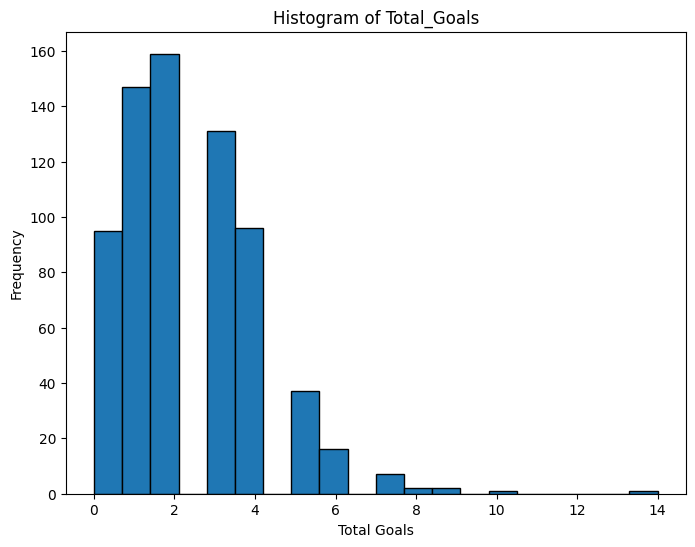

In [90]:
plt.figure(figsize=(8, 6))
plt.hist(df['Total_Goals'], bins=20, edgecolor='black')
plt.title('Histogram of Total_Goals')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

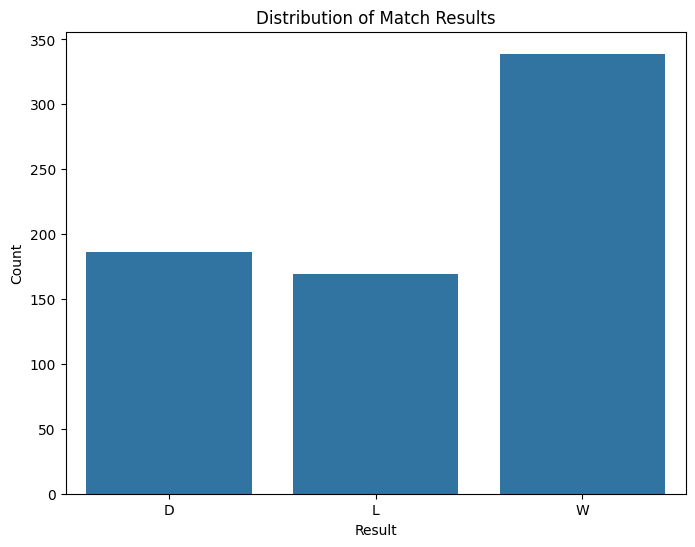

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Result', data=df)
plt.title('Distribution of Match Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

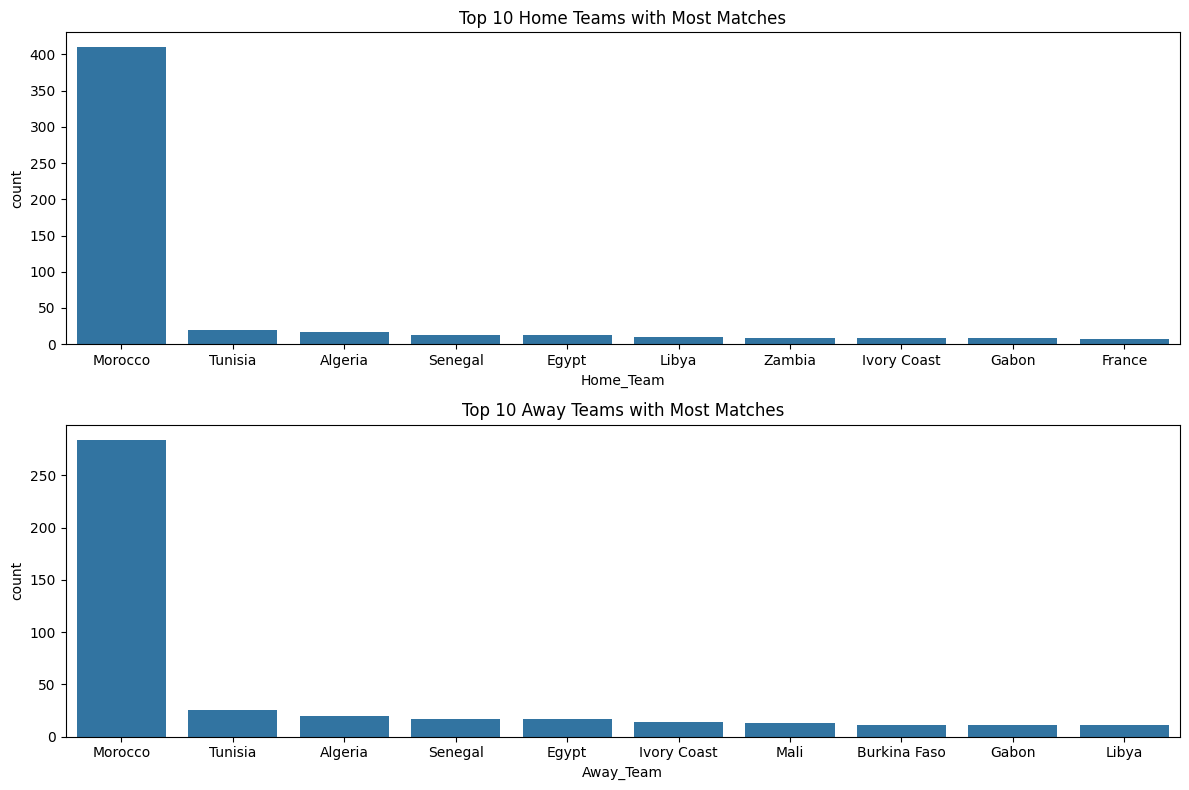

In [58]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.countplot(x='Home_Team', data=df, order=df['Home_Team'].value_counts().index[:10])
plt.title('Top 10 Home Teams with Most Matches')

plt.subplot(2, 1, 2)
sns.countplot(x='Away_Team', data=df, order=df['Away_Team'].value_counts().index[:10])
plt.title('Top 10 Away Teams with Most Matches')

plt.tight_layout()
plt.show()

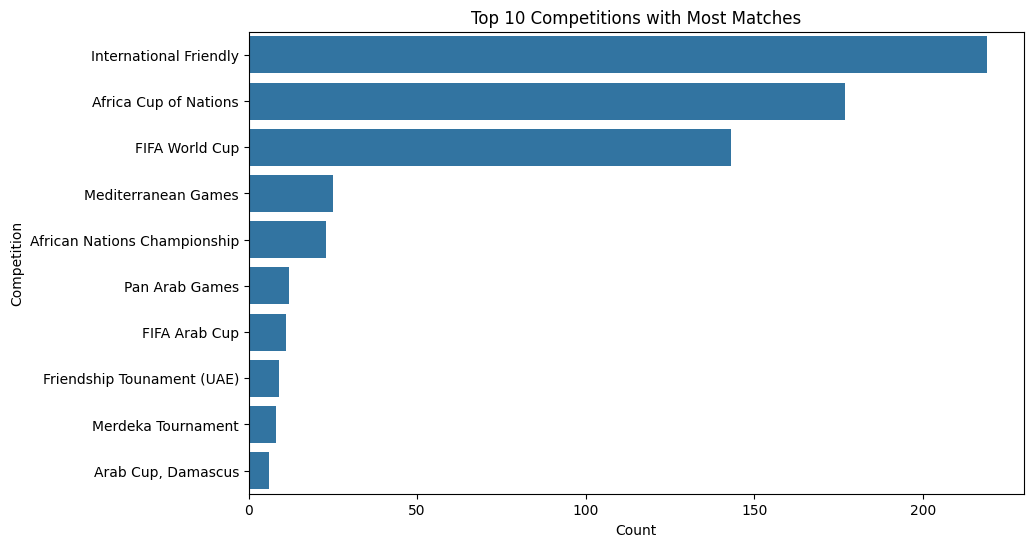

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Competition', data=df, order=df['Competition'].value_counts().index[:10])
plt.title('Top 10 Competitions with Most Matches')
plt.xlabel('Count')
plt.ylabel('Competition')
plt.show()

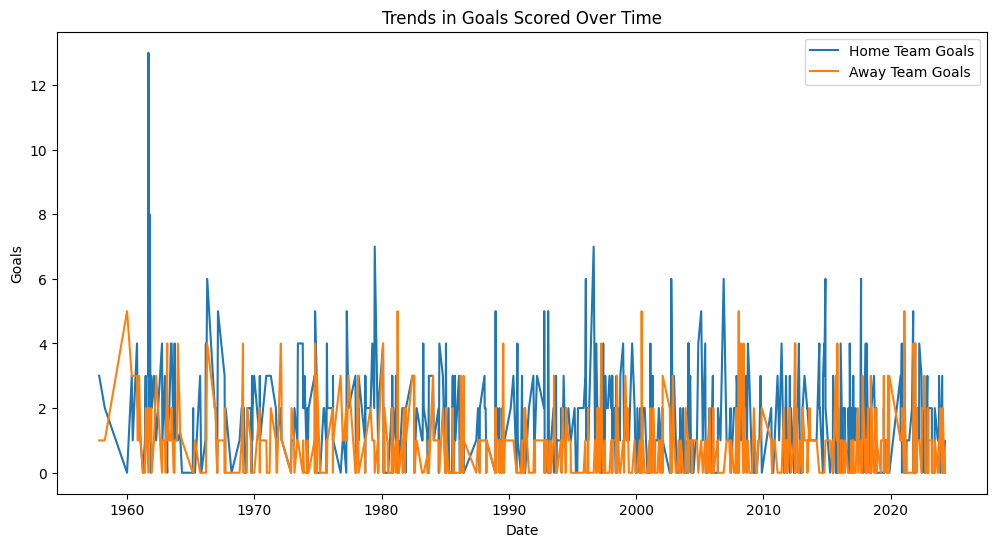

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Home_Score', data=df, label='Home Team Goals')
sns.lineplot(x='Date', y='Away_Score', data=df, label='Away Team Goals')
plt.title('Trends in Goals Scored Over Time')
plt.xlabel('Date')
plt.ylabel('Goals')
plt.legend()
plt.show()

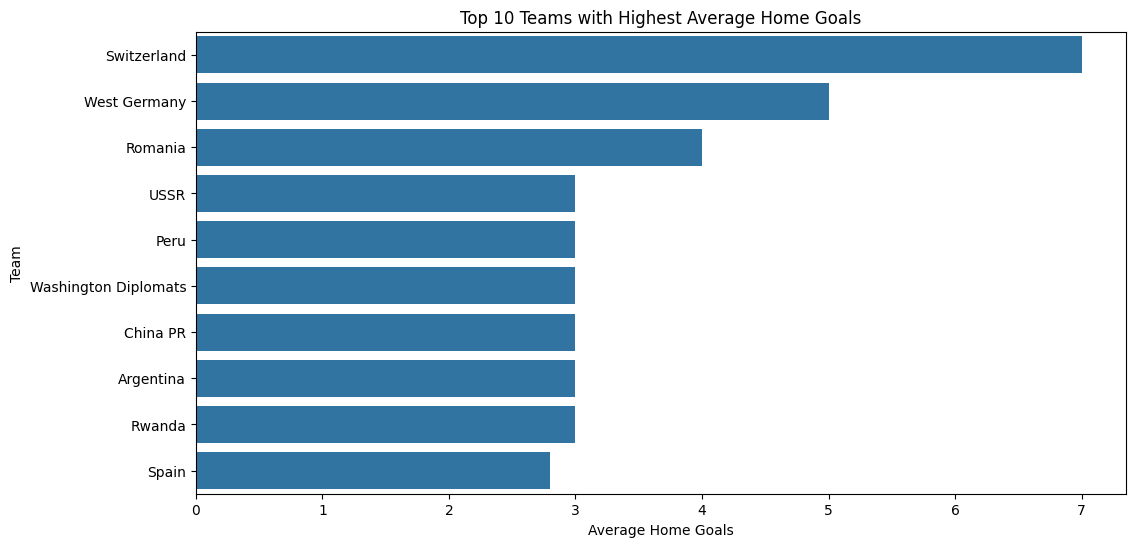

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Avg_Home_Score', y='Home_Team', data=home_team_stats.sort_values(by='Avg_Home_Score', ascending=False).head(10))
plt.title('Top 10 Teams with Highest Average Home Goals')
plt.xlabel('Average Home Goals')
plt.ylabel('Team')
plt.show()

In [53]:
home_team_stats = df.groupby('Home_Team').agg({
    'Home_Score': ['mean', 'std'],
    'Result': lambda x: (x == 'W').mean()
}).reset_index()
home_team_stats.columns = ['Home_Team', 'Avg_Home_Score', 'Std_Home_Score', 'Win_Rate']

# Example 4: Correlation analysis
correlation_matrix = df[['Home_Score', 'Away_Score']].corr()


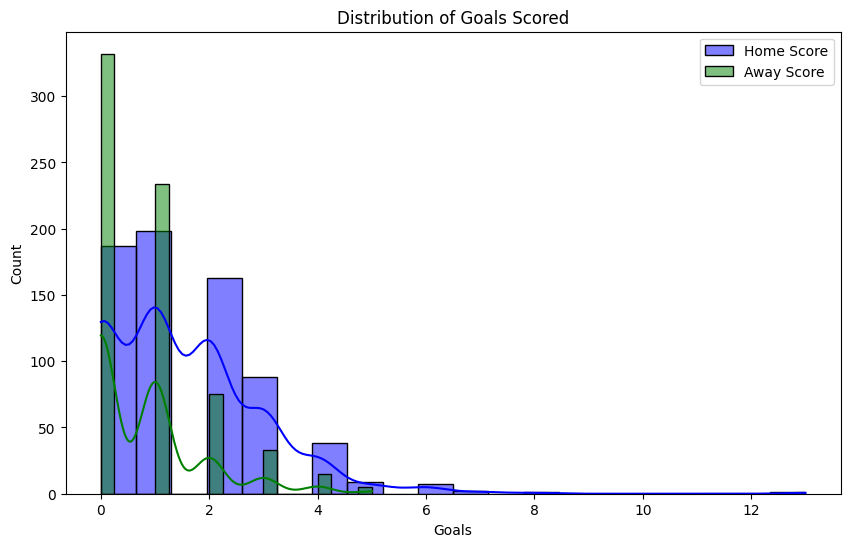

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Home_Score'], bins=20, kde=True, color='blue', label='Home Score')
sns.histplot(df['Away_Score'], bins=20, kde=True, color='green', label='Away Score')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Count')
plt.legend()
plt.show()


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [30]:
# Feature engineering: create total goals column
df['Goal_Difference'] = df['Home_Score'] - df['Away_Score']
df['Is_Home_Win'] = (df['Home_Score'] > df['Away_Score']).astype(int)
df['Is_Away_Win'] = (df['Away_Score'] > df['Home_Score']).astype(int)

In [67]:
le = LabelEncoder()
df['Result_Encoded'] = le.fit_transform(df['Result'])

NameError: name 'LabelEncoder' is not defined

In [68]:
# Prepare features (X) and target variable (y)
X = df[['Home_Score', 'Away_Score', 'Total_Goals', 'Goal_Difference', 'Is_Home_Win', 'Is_Away_Win']]  
y = df['Result']  # Target variable

In [32]:
# Encode categorical target variable
y = y.astype('category').cat.codes

In [33]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Initialize and train a Decision Tree model with class weights
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [41]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.762589928057554
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       0.45      0.50      0.48        30
           2       0.79      0.75      0.77        71

    accuracy                           0.76       139
   macro avg       0.74      0.75      0.74       139
weighted avg       0.77      0.76      0.76       139



In [37]:
importances = model.feature_importances_
feature_names = X.columns

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

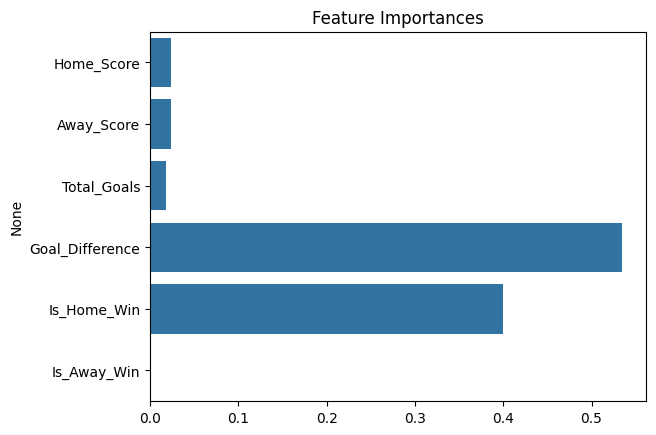

In [39]:
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.show()

In [46]:
new_data = pd.DataFrame({
    'Date': ['2024-06-15'],
    'Match': ['Morocco v Tunisia'],
    'Score': ['2-1'],
    'Competition': ['International Friendly'],
    'Home_Team': ['Morocco'],
    'Away_Team': ['Tunisia']
})

In [47]:
new_data['Date'] = pd.to_datetime(new_data['Date'], format='%Y-%m-%d')
new_data[['Home_Team', 'Away_Team']] = new_data['Match'].str.split(' v ', expand=True)
new_data['Score'] = new_data['Score'].str.extract(r'(\d+-\d+)')
new_data[['Home_Score', 'Away_Score']] = new_data['Score'].str.split('-', expand=True)
new_data['Home_Score'] = pd.to_numeric(new_data['Home_Score'])
new_data['Away_Score'] = pd.to_numeric(new_data['Away_Score'])
new_data['Goal_Difference'] = new_data['Home_Score'] - new_data['Away_Score']
new_data['Total_Goals'] = new_data['Home_Score'] + new_data['Away_Score']
new_data['Is_Home_Win'] = (new_data['Home_Score'] > new_data['Away_Score']).astype(int)
new_data['Is_Away_Win'] = (new_data['Away_Score'] > new_data['Home_Score']).astype(int)

# Predict using your trained model
new_X = new_data[['Home_Score', 'Away_Score', 'Total_Goals', 'Goal_Difference', 'Is_Home_Win', 'Is_Away_Win']]
new_predictions = model.predict(new_X)

# Display predictions
new_data['Predicted_Result'] = pd.Categorical.from_codes(new_predictions, categories=['L', 'D', 'W'])
print(new_data[['Date', 'Match', 'Predicted_Result']])

        Date              Match Predicted_Result
0 2024-06-15  Morocco v Tunisia                D
